# Simulador de colas en cine

### Complementos necesarios

In [62]:
pip install simpy

Note: you may need to restart the kernel to use updated packages.


### Librerias

In [275]:
import simpy
import random
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Creacion de clientes

In [276]:

class Persona:
    ultimo_id = 0
        
    def __init__(self):
        Persona.ultimo_id += 1
        self.id = Persona.ultimo_id
        self.edad = random.randint(14, 60)
        self.genero = random.choice(["Femenino", "Masculino"])
        self.nivel_paciencia = random.randint(1, 3)
        
    def tiempo_decidir(self):
        return self.edad * 0.02 + self.nivel_paciencia

# Definir numero de personas

In [277]:
num_personas = 60

#### Generacion de n clientes

In [278]:

personas = [Persona() for _ in range(num_personas)]

# Crear DataFrame
df_personas = pd.DataFrame(
    data={
        "Identificacion": [persona.id for persona in personas],
        "Edad": [persona.edad for persona in personas],
        "Genero": [persona.genero for persona in personas],
        "Nivel_Paciencia": [persona.nivel_paciencia for persona in personas],
        "Tiempo_Decidir (min)": [persona.tiempo_decidir() for persona in personas]
    }
)

In [279]:
df_personas

,Identificacion,Edad,Genero,Nivel_Paciencia,Tiempo_Decidir (min)
0,1,26,Femenino,1,1.52
1,2,18,Masculino,1,1.36
2,3,59,Femenino,3,4.18
3,4,56,Masculino,2,3.12
4,5,30,Masculino,3,3.60
5,6,60,Masculino,3,4.20
6,7,48,Masculino,2,2.96
7,8,30,Femenino,3,3.60
8,9,33,Femenino,3,3.66
9,10,21,Femenino,2,2.42


#### Creación de empleados

In [280]:
import random

class Empleado:
    ultimo_id = 0
        
    def __init__(self):
        Empleado.ultimo_id += 1
        self.id = Empleado.ultimo_id
        self.experiencia = random.randint(50, 100) / 100  # Genera un número entre 50 y 100 y lo convierte en decimal
        #donde 100:0 experiencia, 99:1 de experiencia, y seguido hasta 50:50 de experiencia.
        self.tiempo_general = 5
        
    def tiempo_promedio(self):
        return self.tiempo_general * self.experiencia


# Definir numero de servidores

In [281]:
num_servidores = 3

#### Generación de empleados en base a los servidores

In [282]:
empleados = [Empleado() for _ in range(num_servidores)]

In [283]:
df_empleados = pd.DataFrame(
    data={
        "Identificacion": [empleado.id for empleado in empleados],
        "Experiencia": [empleado.experiencia for empleado in empleados],
        "Tiempo general de Empleado (min)": [empleado.tiempo_general for empleado in empleados],
        "Tiempo promedio de Empleado (min)": [empleado.tiempo_promedio() for empleado in empleados]
    }
)

In [284]:
df_empleados

,Identificacion,Experiencia,Tiempo general de Empleado (min),Tiempo promedio de Empleado (min)
0,1,0.58,5,2.90
1,2,0.59,5,2.95
2,3,0.72,5,3.60


In [285]:
def persona_llega(env, persona, df_empleados, df_resultados):
    tiempo_decision = persona["Tiempo_Decidir (min)"]

    # Seleccionar un empleado al azar
    empleado = df_empleados.sample().iloc[0]

    tiempo_empleado = empleado["Tiempo promedio de Empleado (min)"]

    yield env.timeout(tiempo_decision + tiempo_empleado)

    df_resultados.loc[len(df_resultados)] = [persona["Identificacion"],persona["Genero"], empleado["Identificacion"],persona["Edad"], tiempo_decision + tiempo_empleado]

In [286]:
def simular_cola(df_personas, df_empleados):
    env = simpy.Environment()
    df_resultados = pd.DataFrame(columns=["Id_Persona","Genero", "Id_Empleado","Edad", "Tiempo_Total_Servicio(Ts)"])

    for _, persona in df_personas.iterrows():
        env.process(persona_llega(env, persona, df_empleados, df_resultados))

    env.run(until=100)  # Ajusta este valor según sea necesario

    return df_resultados

In [287]:
df_resultados_simulacion = simular_cola(df_personas, df_empleados)

In [288]:
df_resultados_simulacion=df_resultados_simulacion.sort_values(by="Id_Persona")
df_resultados_simulacion

,Id_Persona,Genero,Id_Empleado,Edad,Tiempo_Total_Servicio(Ts)
3,1,Femenino,2.0,26,4.47
2,2,Masculino,2.0,18,4.31
54,3,Femenino,1.0,59,7.08
33,4,Masculino,1.0,56,6.02
43,5,Masculino,2.0,30,6.55
59,6,Masculino,3.0,60,7.80
30,7,Masculino,2.0,48,5.91
44,8,Femenino,2.0,30,6.55
48,9,Femenino,2.0,33,6.61
17,10,Femenino,2.0,21,5.37


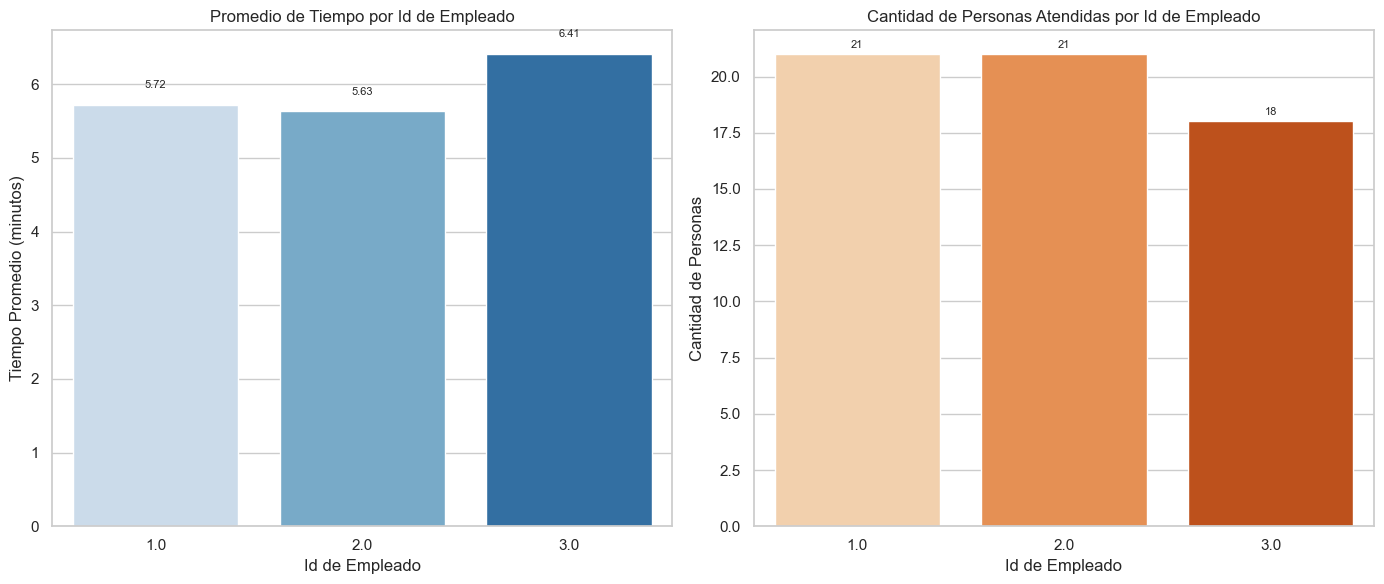

In [289]:
# Calcular el promedio de tiempo por Id de Empleado
promedio_tiempo = df_resultados_simulacion.groupby('Id_Empleado')['Tiempo_Total_Servicio(Ts)'].mean().reset_index()

# Contar la cantidad de personas atendidas por empleado
cantidad_personas = df_resultados_simulacion['Id_Empleado'].value_counts().reset_index()
cantidad_personas.columns = ['Id_Empleado', 'Cantidad_Personas']

# Configuración de estilo de seaborn
sns.set(style="whitegrid")

# Crear las gráficas
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# Gráfica del promedio de tiempo por Id de Empleado
sns.barplot(x='Id_Empleado', y='Tiempo_Total_Servicio(Ts)', data=promedio_tiempo, palette='Blues', ax=axes[0])
axes[0].set_title('Promedio de Tiempo por Id de Empleado')
axes[0].set_xlabel('Id de Empleado')
axes[0].set_ylabel('Tiempo Promedio (minutos)')

# Añadir valores en las barras
for index, value in enumerate(promedio_tiempo['Tiempo_Total_Servicio(Ts)']):
    axes[0].text(index, value + 0.2, f'{value:.2f}', ha='center', va='bottom', fontsize=8)

# Gráfica de la cantidad de personas atendidas por empleado
sns.barplot(x='Id_Empleado', y='Cantidad_Personas', data=cantidad_personas, palette='Oranges', ax=axes[1])
axes[1].set_title('Cantidad de Personas Atendidas por Id de Empleado')
axes[1].set_xlabel('Id de Empleado')
axes[1].set_ylabel('Cantidad de Personas')

# Añadir valores en las barras
for index, value in enumerate(cantidad_personas['Cantidad_Personas']):
    axes[1].text(index, value + 0.2, f'{value}', ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()